<a href="https://colab.research.google.com/github/Matinnorouzi2023/Data-structure/blob/main/LSTM_model__BTC_USD_forecasting_using_deep_learning_and_statistical_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

این کد یک مدل پیش‌بینی قیمت سهام با استفاده از شبکه‌های عصبی بازگشتی (LSTM) را پیاده‌سازی می‌کند. در ادامه، هر خط کد و عملکرد آن توضیح داده شده است:
**bold text**


1. وارد کردن کتابخانه‌های لازم: کتابخانه‌های numpy, pandas, tensorflow, sklearn, و matplotlib برای محاسبات عددی، کار با داده‌ها، ساخت مدل‌های یادگیری ماشین، و ترسیم نمودارها به کار می‌روند.

2. دریافت داده‌های سهام با استفاده از `yfinance`: داده‌های سهام برای نماد 'BTC-USD' از تاریخ شروع '2010-01-01' تا تاریخ پایان '2024-08-01' دریافت می‌شوند.

3. پیش‌پردازش داده‌ها: ابتدا بررسی می‌شود که آیا داده‌های سهام خالی نیستند. سپس، داده‌های 'Close' با استفاده از MinMaxScaler نرمال‌سازی می‌شوند.

4. تعریف اندازه پنجره برای مدل LSTM: یک پنجره با اندازه 50 برای تعریف ویژگی‌ها (X) و برچسب‌ها (y) استفاده می‌شود.

5. تبدیل به آرایه‌های `numpy` و تغییر شکل داده‌ها: داده‌ها به آرایه‌های numpy تبدیل شده و برای ورودی مدل LSTM تغییر شکل داده می‌شوند.

6. تقسیم داده‌ها به دو مجموعه آموزشی و آزمایشی: داده‌ها با استفاده از تابع train_test_split به دو بخش آموزشی و آزمایشی تقسیم می‌شوند.

7. ساخت مدل LSTM: یک مدل Sequential با دو لایه LSTM و یک لایه Dense برای پیش‌بینی قیمت ساخته می‌شود.

8. کامپایل مدل: مدل با استفاده از بهینه‌ساز 'adam' و تابع ضرر 'mean_squared_error' کامپایل می‌شود.

9. آموزش مدل: مدل با داده‌های آموزشی برای 25 دوره (epoch) آموزش داده می‌شود.

10. پیش‌بینی و ترسیم نتایج: پس از آموزش، مدل برای پیش‌بینی قیمت‌ها روی داده‌های آزمایشی استفاده می‌شود و نتایج با استفاده از نمودار ترسیم می‌شوند.

11. محاسبه RMSE: خطای میانگین مربعات ریشه‌ای (RMSE) برای ارزیابی مدل محاسبه می‌شود.

12. ترسیم نتایج: نمودار قیمت واقعی و پیش‌بینی شده ترسیم می‌شود.








ورودی این کد داده‌های قیمت سهام است و خروجی آن پیش‌بینی قیمت سهام و نمودار مقایسه قیمت واقعی و پیش‌بینی شده است. تابع پاداش (یا تابع ضرر) که در اینجا 'mean_squared_error' است، اختلاف مربعات بین قیمت‌های واقعی و پیش‌بینی شده را محاسبه می‌کند و مدل سعی می‌کند این اختلاف را کمینه کند. پیش‌بینی با استفاده از مدل آموزش دیده و داده‌های آزمایشی انجام می‌شود.



In [ ]:
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install keras
!pip install starsmodels
!pip install pmdarima
!pip install --upgrade pandas_datareader
!pip install matplotlib
!pip install scikit-learn
!pip install yfinance

ERROR: Could not find a version that satisfies the requirement starsmodels (from versions: none)
ERROR: No matching distribution found for starsmodels


[*********************100%%**********************]  1 of 1 completed


Epoch 1/25
85/85 [==============================] - 54s 586ms/step - loss: 0.0047
Epoch 2/25
85/85 [==============================] - 46s 539ms/step - loss: 6.5880e-04
Epoch 3/25
85/85 [==============================] - 46s 541ms/step - loss: 5.9317e-04
Epoch 4/25
85/85 [==============================] - 45s 529ms/step - loss: 5.0746e-04
Epoch 5/25
85/85 [==============================] - 46s 538ms/step - loss: 4.7451e-04
Epoch 6/25
85/85 [==============================] - 47s 557ms/step - loss: 4.7476e-04
Epoch 7/25
85/85 [==============================] - 46s 540ms/step - loss: 4.1025e-04
Epoch 8/25
85/85 [==============================] - 45s 529ms/step - loss: 4.3757e-04
Epoch 9/25
85/85 [==============================] - 53s 620ms/step - loss: 3.0530e-04
Epoch 10/25
85/85 [==============================] - 46s 539ms/step - loss: 3.6923e-04
Epoch 11/25
85/85 [==============================] - 46s 538ms/step - loss: 2.8092e-04
Epoch 12/25
85/85 [==============================] - 45s

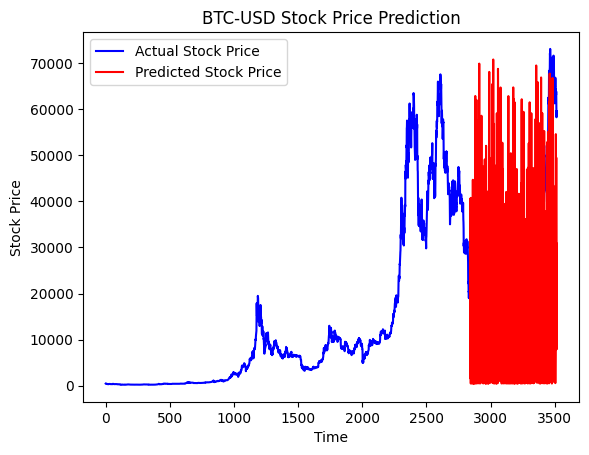

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import yfinance as yf

# Ensure you have the libraries installed:
# pip install numpy pandas tensorflow yfinance matplotlib scikit-learn

# Fetch stock data using yfinance
stock_symbol = 'BTC-USD'  # Example stock symbol for Bitcoin USD
start_date = '2010-01-01'
end_date = '2024-08-01'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Check if stock_data is empty before proceeding with preprocessing
if not stock_data.empty:
    # Preprocess data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

    # Define a window size for the LSTM model
    window_size = 150
    X = []
    y = []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    # Convert to numpy arrays
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=150))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    # Predicting and visualizing the stock price
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Calculate RMSE to evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, predicted_stock_price))
    print(f'Root Mean Squared Error: {rmse}')

    # Plot the results
    plt.plot(stock_data['Close'].values, color='blue', label='Actual Stock Price')
    plt.plot(range(len(y_train) + window_size, len(y_train) + window_size + len(predicted_stock_price)), predicted_stock_price, color='red', label='Predicted Stock Price')
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
else:
    print("No stock data available to process.")


